### EKG detection Tutorial:
##### By Dr.Thanawat Wongphan
##### Dec 18, 2024
###### Data Ref: https://www.kaggle.com/datasets/nmack41/ekg-ecg-8channel

##### <u>Note:</u>
###### EKG / ECG 8-Channel
###### 250HzACQ-5000-NORM-35HzLPN-0_05Hz-8_Channels

In [66]:
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [67]:
ekg_raw = pd.read_csv("Data/sample.txt",sep="\t")
display(ekg_raw)

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,Unnamed: 8,Unnamed: 9
0,0.019348,0.181824,0.083862,0.000671,0.008362,-0.004456,-0.003357,0.005005,NaN,NaN
1,0.023193,0.186951,0.086182,0.000671,0.007019,-0.004578,-0.003418,0.005127,NaN,NaN
2,0.026245,0.184753,0.081360,0.000671,0.009094,-0.004517,-0.003479,0.005066,NaN,NaN
3,0.028381,0.180237,0.074951,0.000732,0.006348,-0.004456,-0.003357,0.005066,NaN,NaN
4,0.030701,0.176636,0.069336,0.000732,0.007080,-0.004578,-0.003479,0.005127,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
111603,-0.058411,0.117920,0.222229,0.000793,-0.006348,-0.004395,-0.003174,0.004944,NaN,NaN
111604,-0.033936,0.124451,0.208191,0.000732,-0.004150,-0.004517,-0.003296,0.004944,NaN,NaN
111605,-0.019165,0.116028,0.194458,0.000671,-0.007019,-0.004456,-0.003296,0.005005,NaN,NaN
111606,-0.032837,0.100159,0.196594,0.000671,-0.006470,-0.004639,-0.003296,0.005005,NaN,NaN


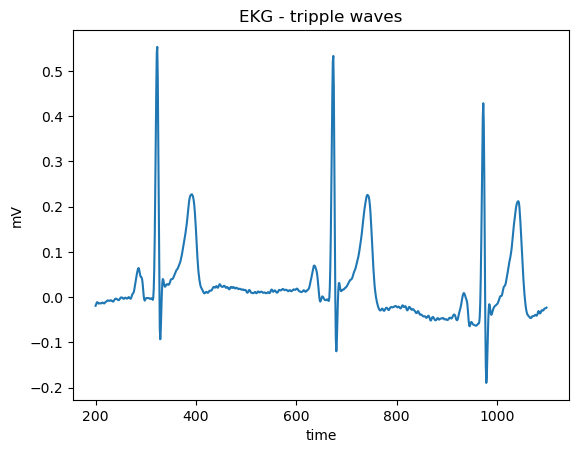

<Figure size 640x480 with 0 Axes>

In [68]:
tripple_waves=ekg_raw[200:1100]
plt.plot(tripple_waves.index, tripple_waves['CH1'])
plt.xlabel("time")  # add X-axis label
plt.ylabel("mV")  # add Y-axis label
plt.title("EKG - tripple waves")  # add title
plt.show()
plt.savefig('fig/Tripple_EKG.png')

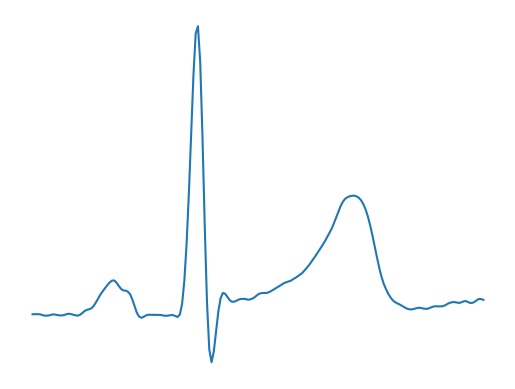

<Figure size 200x200 with 0 Axes>

In [69]:
single_waves=ekg_raw[250:450]
plt.plot(single_waves.index, single_waves['CH1'])
#plt.xlabel("time")  # add X-axis label
#plt.ylabel("mV")  # add Y-axis label
#plt.title("EKG - single waves")  # add title
plt.axis("off")
plt.show()
plt.gcf().set_size_inches(2, 2)
plt.tight_layout()
plt.savefig('fig/fig_size.png', dpi=200)


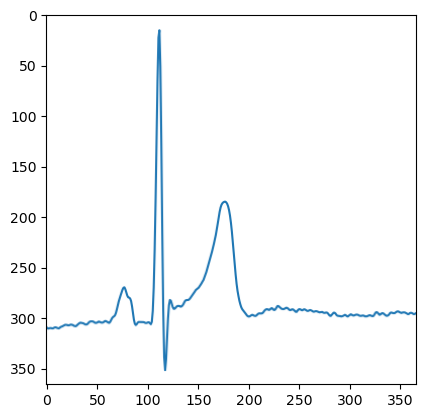

In [70]:
import matplotlib.image as mpimg
image_path = "fig/SingleSquareEKG.png"
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

In [71]:
single_lead=np.array(tripple_waves['CH1'])

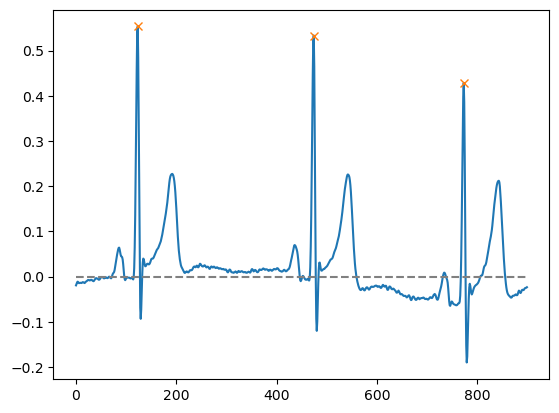

In [72]:
peaks, _ = find_peaks(single_lead, height=0.3)
plt.plot(single_lead)
plt.plot(peaks, single_lead[peaks], "x")
plt.plot(np.zeros_like(single_lead), "--", color="gray")
plt.show()

In [73]:
#Example Calculate the R-R interval
freq=250/1000
RR1=(peaks[1]-peaks[0])*250/1000
RR2=(peaks[2]-peaks[1])*250/1000

print("The first RR interval = {} bpm, the second interval={} bpm".format(RR1,RR2))

The first RR interval = 87.75 bpm, the second interval=74.75 bpm


In [74]:
#Diff function
rr_ekg = np.diff(peaks)
rr_hz=(rr_ekg*freq).astype('int')
display(rr_hz)

array([87, 74])

In [65]:
#Mean function
mean_rr = np.mean(rr_hz)
display(mean_rr )

80.5

In [ ]:
#Home work: whole sequence
#Finding PR Interval -> Mean, SD
#Finding QT Interval -> Mean, SD

In [44]:
#Optional finding HRV
#Ref: https://www.kubios.com/blog/hrv-analysis-methods/

array([0.351, 0.65 ])